In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
mpl.rc('font', family='Noto Sans CJK TC')

## 下載 106 年 1/1 至今年 4/11 期間高雄市的珍珠芭樂「產品日交易行情」excel 檔

In [2]:
df = pd.read_excel('HanBala2.xls')

In [3]:
df.head(10)

,水果 產品日交易行情,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,交易日期：,106/01/01 ~ 108/04/11 (農曆:105/12/04 ~ 108/03/07),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,市 場：,高雄市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,產 品：,P1 番石榴 珍珠芭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,日 期,市 場,產 品,上價,中價,下價,平均價(元/公斤),增減%,交易量(公斤),增減%,NaN
4,106/01/01,800 高雄市,P1 番石榴 珍珠芭,70,65.4,42.3,61.7,+ 5,326,- 89,0.0
5,106/01/03,800 高雄市,P1 番石榴 珍珠芭,76.2,61.7,42.5,60.7,- 2,2033,+524,0.0
6,106/01/04,800 高雄市,P1 番石榴 珍珠芭,75,65.9,44.5,63.5,+ 5,364,- 82,0.0
7,106/01/05,800 高雄市,P1 番石榴 珍珠芭,70,59,50,59.4,- 6,640,+ 76,0.0
8,106/01/06,800 高雄市,P1 番石榴 珍珠芭,79.2,57.7,39,58.3,- 2,1306,+104,0.0
9,106/01/07,800 高雄市,P1 番石榴 珍珠芭,75.5,57.3,47.9,59.1,+ 1,1716,+ 31,0.0


## 整理

In [4]:
colnames = df.loc[3].values
df=df[4:]
df.columns = colnames
df_r,df_c = df.shape

In [5]:
df.head()

,日 期,市 場,產 品,上價,中價,下價,平均價(元/公斤),增減%,交易量(公斤),增減%,nan
4,106/01/01,800 高雄市,P1 番石榴 珍珠芭,70,65.4,42.3,61.7,+ 5,326,- 89,0.0
5,106/01/03,800 高雄市,P1 番石榴 珍珠芭,76.2,61.7,42.5,60.7,- 2,2033,+524,0.0
6,106/01/04,800 高雄市,P1 番石榴 珍珠芭,75,65.9,44.5,63.5,+ 5,364,- 82,0.0
7,106/01/05,800 高雄市,P1 番石榴 珍珠芭,70,59,50,59.4,- 6,640,+ 76,0.0
8,106/01/06,800 高雄市,P1 番石榴 珍珠芭,79.2,57.7,39,58.3,- 2,1306,+104,0.0


In [6]:
df.index = range(1,df_r+1)

In [7]:
df.head()

,日 期,市 場,產 品,上價,中價,下價,平均價(元/公斤),增減%,交易量(公斤),增減%,nan
1,106/01/01,800 高雄市,P1 番石榴 珍珠芭,70,65.4,42.3,61.7,+ 5,326,- 89,0.0
2,106/01/03,800 高雄市,P1 番石榴 珍珠芭,76.2,61.7,42.5,60.7,- 2,2033,+524,0.0
3,106/01/04,800 高雄市,P1 番石榴 珍珠芭,75,65.9,44.5,63.5,+ 5,364,- 82,0.0
4,106/01/05,800 高雄市,P1 番石榴 珍珠芭,70,59,50,59.4,- 6,640,+ 76,0.0
5,106/01/06,800 高雄市,P1 番石榴 珍珠芭,79.2,57.7,39,58.3,- 2,1306,+104,0.0


### 想簡潔列出 colnames

In [8]:
df_r,df_c = df.shape

In [9]:
df_r,df_c

(672, 11)

In [10]:
for i in range(df_c):
    print(df.columns[i])

日　　期
市　　場
產　　品
上價
中價
下價
平均價(元/公斤)
增減%
交易量(公斤)
增減%
nan


In [11]:
df[['日　　期','平均價(元/公斤)','交易量(公斤)']].head()

,日 期,平均價(元/公斤),交易量(公斤)
1,106/01/01,61.7,326
2,106/01/03,60.7,2033
3,106/01/04,63.5,364
4,106/01/05,59.4,640
5,106/01/06,58.3,1306


In [12]:
df[['日　　期','平均價(元/公斤)','交易量(公斤)']].tail()

,日 期,平均價(元/公斤),交易量(公斤)
668,108/04/05,11.5,900
669,108/04/09,13.2,5241
670,108/04/10,13.3,5855
671,108/04/11,13,4354
672,小 計,0,0


### 去掉小計

In [13]:
df = df.drop(df[df['日　　期']=='小　　計'].index,axis=0)

In [14]:
df.head()

,日 期,市 場,產 品,上價,中價,下價,平均價(元/公斤),增減%,交易量(公斤),增減%,nan
1,106/01/01,800 高雄市,P1 番石榴 珍珠芭,70,65.4,42.3,61.7,+ 5,326,- 89,0.0
2,106/01/03,800 高雄市,P1 番石榴 珍珠芭,76.2,61.7,42.5,60.7,- 2,2033,+524,0.0
3,106/01/04,800 高雄市,P1 番石榴 珍珠芭,75,65.9,44.5,63.5,+ 5,364,- 82,0.0
4,106/01/05,800 高雄市,P1 番石榴 珍珠芭,70,59,50,59.4,- 6,640,+ 76,0.0
5,106/01/06,800 高雄市,P1 番石榴 珍珠芭,79.2,57.7,39,58.3,- 2,1306,+104,0.0


In [15]:
ndf = df[['日　　期','平均價(元/公斤)','交易量(公斤)']]

In [16]:
ndf.head()

,日 期,平均價(元/公斤),交易量(公斤)
1,106/01/01,61.7,326
2,106/01/03,60.7,2033
3,106/01/04,63.5,364
4,106/01/05,59.4,640
5,106/01/06,58.3,1306


## 整理好了 開始畫圖

In [17]:
x = np.array(ndf['平均價(元/公斤)'])
y = np.array(ndf['交易量(公斤)'])

Text(0, 0.5, '交易量(公斤)')

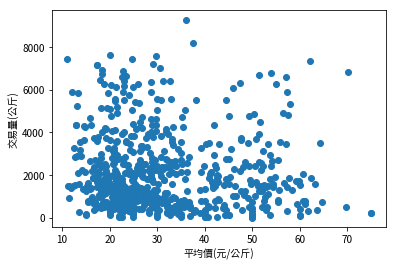

In [18]:
plt.scatter(x,y);
plt.xlabel('平均價(元/公斤)')
plt.ylabel('交易量(公斤)')

In [19]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
X = x.reshape(len(x),1)
Y = y.reshape(len(y),1)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=555)

Text(0, 0.5, '交易量(公斤)')

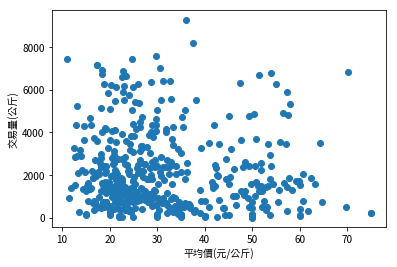

In [21]:
plt.scatter(x_train,y_train);
plt.xlabel('平均價(元/公斤)')
plt.ylabel('交易量(公斤)')

In [22]:
regr.fit(x_train,y_train)
Y_pred = regr.predict(x_test)


Text(0, 0.5, '交易量(公斤)')

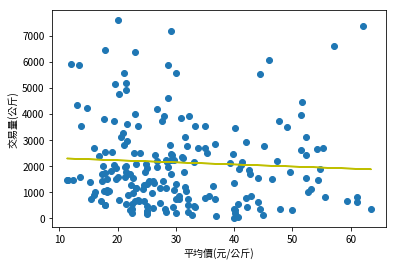

In [25]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'y');
plt.xlabel('平均價(元/公斤)')
plt.ylabel('交易量(公斤)')

In [24]:
regr.score(x_test, y_test)


-0.0022653828859724445

相關係數＝-0.0023

## 可見價格與銷售量的相關性很低

原本以為會有不小的關聯，但看來不是一個好題目ˊˋ